In [1]:
import sys
from importlib import reload 
sys.path.append('../hdssm_story/lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_hs", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_hs", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_ex", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex", scalable=True))
        ], "sum"),
    ]

def make_distances_2(for_ranking=True):
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
    ]

_____________


In [8]:
!ls ../datasets

3d_sphere_triang_120.edges   clique_4.edges		  graph.clusters
3d_sphere_triang_1920.edges  clique_5.edges		  karate.edges
3d_sphere_triang_30.edges    conflict.edges		  polblogs.edges
3d_sphere_triang_480.edges   cora			  polbooks.edges
airport.edges		     CSPhDs.edges		  power.edges
bg_20_700_0.05.edges	     cycle_100.edges		  reactome.edges
bipartite_100.edges	     cycle_5.edges		  smalltree.edges
bipartite_5.edges	     dolphins.edges		  star_100.edges
ca-cit-HepTh.edges	     eu-core.edges		  star_5.edges
Ca-HelpTh.edges		     eu-core-no-self-loops.edges  tree_3_6.edges
chicago.edges		     euroroad.edges		  usca312.edges
citeseer		     EuroSiS.edges		  wla6.edges
clique_100.edges	     facebook.edges		  wla6.nodes
clique_12.edges		     football.edges


In [9]:
G, distances_matrix, r_matrix  = utils.get_dataset("CSPhDs.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/CSPhDs.edges
|V| = 1025, |E| = 1043


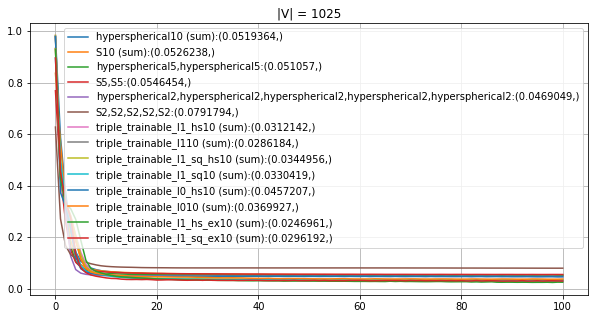


0.0519364	hyperspherical10 (sum)
0.0526238	S10 (sum)
0.051057	hyperspherical5,hyperspherical5
0.0546454	S5,S5
0.0469049	hyperspherical2,hyperspherical2,hyperspherical2,hyperspherical2,hyperspherical2
0.0791794	S2,S2,S2,S2,S2
0.0312142	triple_trainable_l1_hs10 (sum)
0.0286184	triple_trainable_l110 (sum)
0.0344956	triple_trainable_l1_sq_hs10 (sum)
0.0330419	triple_trainable_l1_sq10 (sum)
0.0457207	triple_trainable_l0_hs10 (sum)
0.0369927	triple_trainable_l010 (sum)
0.0246961	triple_trainable_l1_hs_ex10 (sum)
0.0296192	triple_trainable_l1_sq_ex10 (sum)


In [10]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

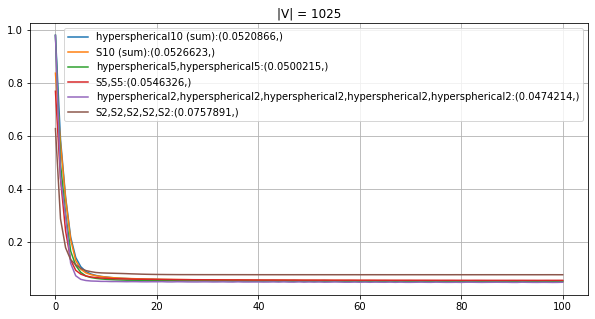


0.0520866	hyperspherical10 (sum)
0.0526623	S10 (sum)
0.0500215	hyperspherical5,hyperspherical5
0.0546326	S5,S5
0.0474214	hyperspherical2,hyperspherical2,hyperspherical2,hyperspherical2,hyperspherical2
0.0757891	S2,S2,S2,S2,S2


In [10]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

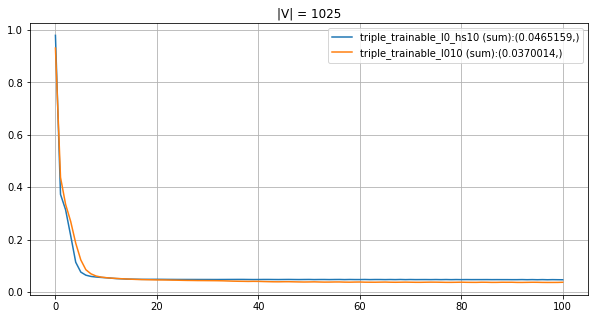

0.0465159	triple_trainable_l0_hs10 (sum)
0.0370014	triple_trainable_l010 (sum)


In [42]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

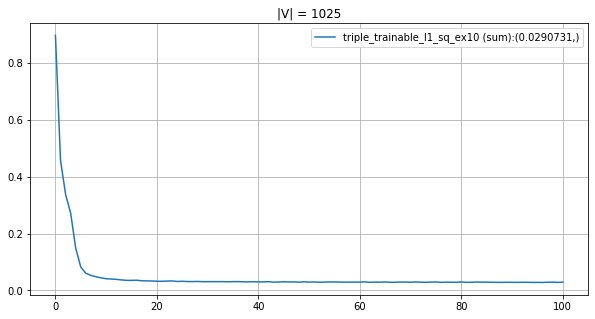

0.0290731	triple_trainable_l1_sq_ex10 (sum)


In [85]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

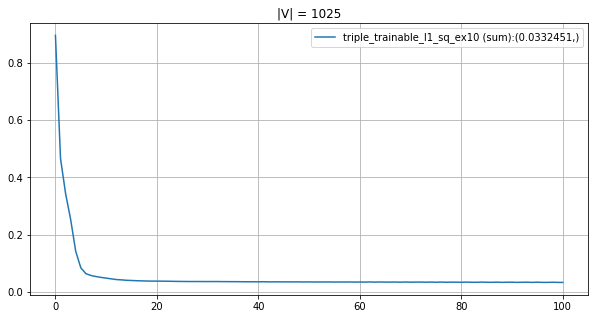

0.0332451	triple_trainable_l1_sq_ex10 (sum)


In [68]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

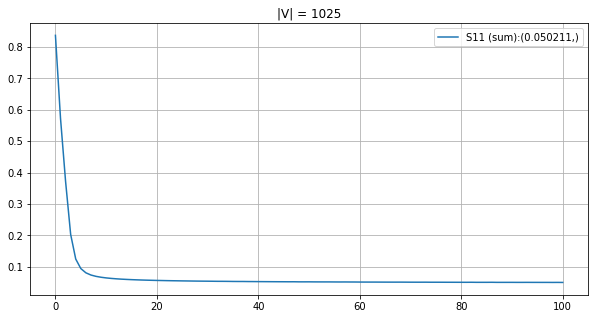

0.050211	S11 (sum)


In [69]:
total_loss_story_2 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_2(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

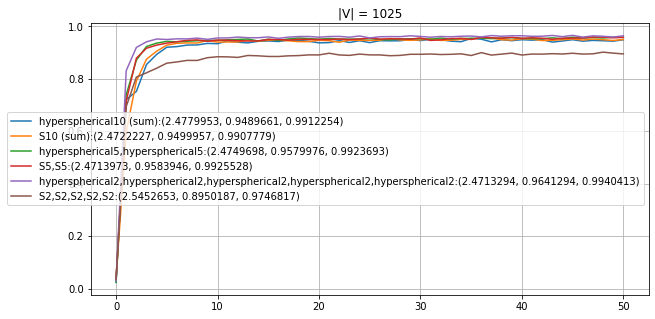

0:6.9327285296654955



AssertionError: 

In [12]:
total_loss_story_s1 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances(), iters=1000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)